In [2]:
import sys
print(sys.executable)

c:\Users\shara\AppData\Local\Programs\Python\Python313\python.exe


In [3]:
!pip install tensorflow

  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
    --------------------------------------- 6.6/332.0 MB 35.6 MB/s eta 0:00:10
   - -------------------------------------- 16.0/332.0 MB 40.9 MB/s eta 0:00:08
   --- ------------------------------------ 26.0/332.0 MB 44.2 MB/s eta 0:00:07
   ---- ----------------------------------- 36.7/332.0 MB 46.5 MB/s eta 0:00:07
   ----- ---------------------------------- 47.2/332.0 MB 46.9 MB/s eta 0:00:07
   ------- -------------------------------- 58.2/332.0 MB 47.9 MB/s eta 0:00:06
   -------- ------------------------------- 69.7/332.0 MB 48.7 MB/s eta 0:00:06
   --------- ------------------------------ 77.6/332.0 MB 48.9 MB/s eta 0:00:06
   --------- ------------------------------ 81.5/332.0 MB 44.2 MB/s eta 0:00:06
   ---------- ----------------------------- 89.9/332.0 MB 44.2 MB/s eta 0:00:06
   ----------- --------------------------- 101.2/332.0 MB 44.7 MB/s

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

c:\Users\shara\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [5]:
url="https://github.com/LinkedInLearning/artificial-intelligence-foundations-neural-networks-4381282/raw/refs/heads/main/Advertising_2023.csv"
df=pd.read_csv(url,index_col=0)
df.head()

,digital,TV,radio,newspaper,sales
1,345.15,156.0,37.8,69.2,22.1
2,66.75,46.0,39.3,45.1,10.4
3,25.80,18.3,45.9,69.3,9.3
4,227.25,145.1,41.3,58.5,18.5
5,271.20,165.2,10.8,58.4,12.9


In [6]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 1199 entries, 1 to 1197
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   digital    1199 non-null   float64
 1   TV         1199 non-null   float64
 2   radio      1199 non-null   float64
 3   newspaper  1199 non-null   float64
 4   sales      1199 non-null   float64
dtypes: float64(5)
memory usage: 56.2 KB


(1199, 5)

In [7]:
#To fidn the null values
df.isnull().sum()

digital      0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<Axes: >

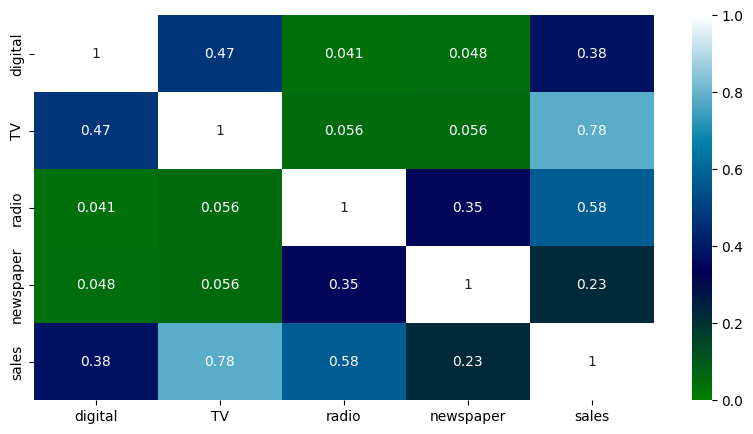

In [8]:
#to find the correlation between the features
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,vmin=0,vmax=1,cmap="ocean")


In [9]:
df.corr()

,digital,TV,radio,newspaper,sales
digital,1.000000,0.474256,0.041316,0.048023,0.380101
TV,0.474256,1.000000,0.055697,0.055579,0.781824
radio,0.041316,0.055697,1.000000,0.353096,0.576528
newspaper,0.048023,0.055579,0.353096,1.000000,0.227039
sales,0.380101,0.781824,0.576528,0.227039,1.000000


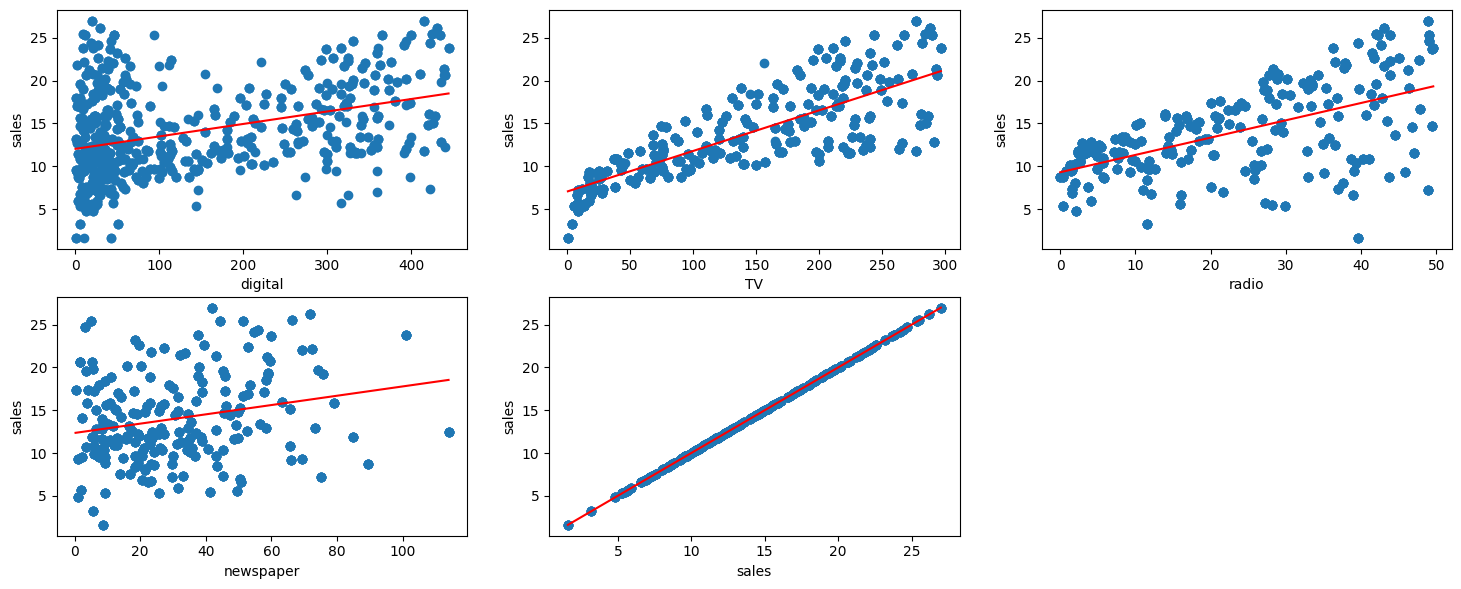

In [10]:
# visiualize all variables  with sales
from scipy import stats
#creates figure
plt.figure(figsize=(18, 18))

for i, col in enumerate(df.columns[0:5]): #iterates over all columns except for price column (last one)
    plt.subplot(5, 3, i+1) # each row three figure
    x = df[col] #x-axis
    y = df['sales'] #y-axis
    plt.plot(x, y, 'o')

    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1)) (np.unique(x)), color='red')
    plt.xlabel(col) # x-label
    plt.ylabel('sales') # y-label


In [11]:
### Now we going to train a linear regression model using keras
##first we pre process the data to make it ready for the NN model
# as the first step we split it as x variables and y output

x=df[['digital','TV','radio','newspaper']]
y=df['sales']

In [12]:
#normalizatin of x features
normalized_features=keras.utils.normalize(x.values)

In [13]:
# Split up the data into a test and training set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4,random_state=101)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(719, 4) (719,) (480, 4) (480,)


In [14]:
#Build and train the model
model= Sequential()
#add the input layer as the first layer. with 4 inputs neurons and relu activation function
model.add(Dense(4,input_dim=4,activation='relu'))
#add a middle hidden layer with 4 neurons
model.add(Dense(3,activation='relu'))
#add the output layer with 1 neuron
model.add(Dense(1))

c:\Users\shara\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
#complie the model
model.compile(optimizer="adam",loss='mse',metrics=['mse'])

In [16]:
#fit the model to test data
history = model.fit(x_train, y_train, validation_data = (x_test, y_test),
                    epochs = 32)

Epoch 1/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 43.4791 - mse: 43.4791 - val_loss: 31.4127 - val_mse: 31.4127
Epoch 2/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30.3374 - mse: 30.3374 - val_loss: 26.5652 - val_mse: 26.5652
Epoch 3/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25.5289 - mse: 25.5289 - val_loss: 22.8480 - val_mse: 22.8480
Epoch 4/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.3715 - mse: 21.3715 - val_loss: 18.8175 - val_mse: 18.8175
Epoch 5/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.4721 - mse: 17.4721 - val_loss: 15.7593 - val_mse: 15.7593
Epoch 6/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.4105 - mse: 14.4105 - val_loss: 13.6129 - val_mse: 13.6129
Epoch 7/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.3769 - mse: 12.3769 - val_loss: 12.0309 - val_mse: 12.0309
Epoch 8/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.8730 - mse: 10.8730 - val_loss: 10.9596 - val_mse: 10.9596
Epoch 9/32
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119 (480.00 B)

 Trainable params: 39 (156.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 80 (324.00 B)

In [18]:
model.evaluate(x_test, y_test)[1]

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.5230 - mse: 3.5230 


3.522963762283325

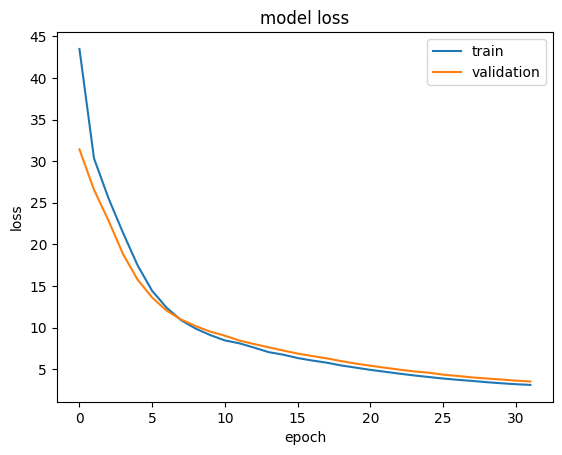

In [19]:
#Visualization of the model results
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [20]:
#predict sales using the model
test_predictions=model.predict(x_test).flatten()
print(test_predictions)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[26.748064  18.841238  15.910855  22.631626  17.42413   27.146463
 10.827791  20.752005  18.334515  14.6992235  6.694128  16.512804
  3.8079648  8.43763    9.738476   5.884018  22.518227  15.709197
  3.8418968 17.811386  21.4536     6.279352  11.492347  12.140917
  8.275756   2.3472626 14.115029  16.953798  11.876079   9.719939
 14.61922   17.113707  20.714132  16.134478  17.755697  11.277938
 24.44962   16.656258  12.76089   18.4012    16.019438  14.544144
  7.2328463 15.576915  14.23373   14.170691   7.0183725 24.44962
 15.203952   9.015563   9.256744   9.738476  11.464539  15.6788645
  3.8874695 17.574728  17.197962  21.378155   9.215065  12.764029
 12.996629  11.795984  13.777234  13.64257    8.471937  12.917351
  9.30893   21.304153   7.0606723 22.564499   6.035769  22.826878
  7.2619915 19.848526  14.5506735 16.42325   18.612467  13.84929
 17.113707  20.786463  17.878176  18.73293   17.855864  16.649536
 17.0974    19.057213  11.250199   7.

In [21]:
# show the true value vs predicted value in a dataframe
true_and_predicted = pd.DataFrame(list(zip(y_test, test_predictions)),
                    columns=['True Value','Predicted Value'])
true_and_predicted.head(6) # Show first six rows

,True Value,Predicted Value
0,26.2,26.748064
1,19.0,18.841238
2,12.8,15.910855
3,20.8,22.631626
4,16.9,17.424129
5,23.8,27.146463


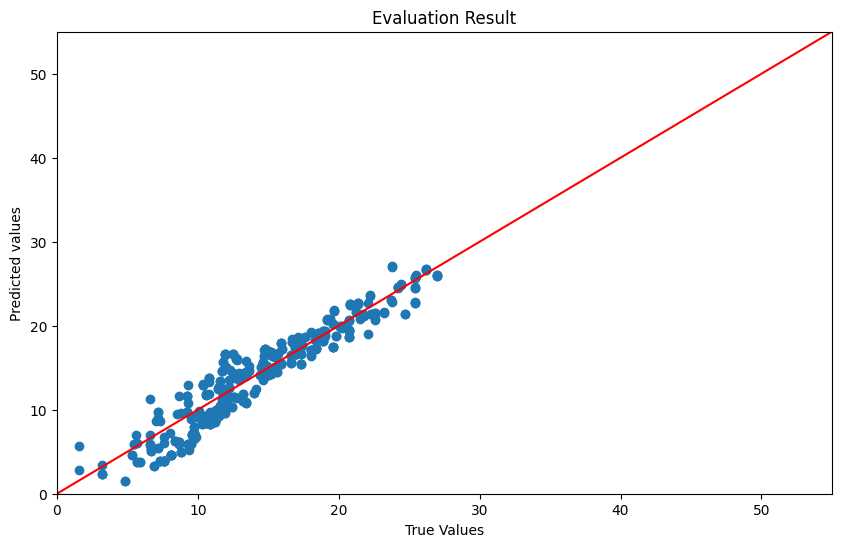

In [22]:
# visualize the prediction uisng diagonal line
y = test_predictions #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()

In [23]:
##mannuall set the hyper parameters to solve the under fitting
#Build and train the model
model2= Sequential()
#add the input layer as the first layer. with 4 inputs neurons and relu activation function
model2.add(Dense(4,input_dim=4,activation='relu'))
#add a middle hidden layer with 4 neurons
model2.add(Dense(4,activation='relu'))
#add another middle hidden layer with 4 neurons
model2.add(Dense(4,activation='relu'))
#add the output layer with 1 neuron
model2.add(Dense(1))

#complie the model
opt=keras.optimizers.Adam(learning_rate=0.001)
model2.compile(optimizer=opt,loss='mse',metrics=['mse'])

#fit the model to test data
histor2 = model2.fit(x_train, y_train, validation_data = (x_test, y_test),
                    epochs = 100)

Epoch 1/100


c:\Users\shara\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1513.5087 - mse: 1513.5087 - val_loss: 1031.7126 - val_mse: 1031.7126
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 779.4467 - mse: 779.4467 - val_loss: 530.7738 - val_mse: 530.7738
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 421.0136 - mse: 421.0136 - val_loss: 294.2013 - val_mse: 294.2013
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 246.5438 - mse: 246.5438 - val_loss: 181.0672 - val_mse: 181.0672
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 159.4772 - mse: 159.4772 - val_loss: 122.4973 - val_mse: 122.4973
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 113.5079 - mse: 113.5079 - val_loss: 90.2651 - val_mse: 90.2651
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 87.9008 - mse: 87.9008 - val_loss: 72.4565 - val_mse: 72.4565
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 73.1699 - mse: 73.1699 - val_loss: 62.4933 - val_mse: 62.4933
Epoch 9/100
23/23 

In [24]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 197 (792.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 132 (532.00 B)

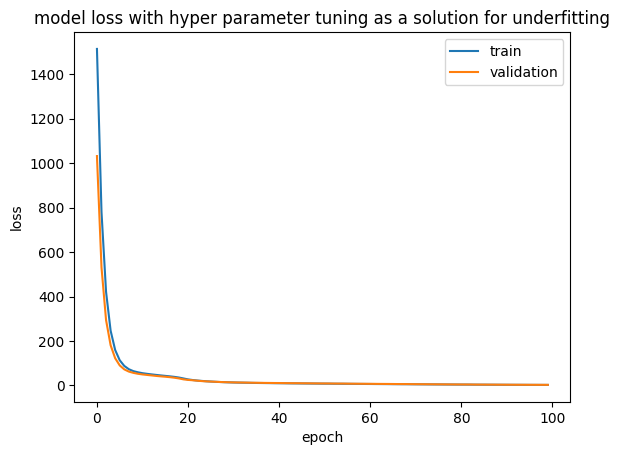

In [25]:
#Visualization of the model results
plt.plot(histor2.history['loss'])
plt.plot(histor2.history['val_loss'])
plt.title('model loss with hyper parameter tuning as a solution for underfitting')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [26]:
##third model with batch training
## Build Model (Building a four layer network - with two hidden layers)
model3 = Sequential()
model3.add(Dense(4,input_dim=4, activation='relu'))
model3.add(Dense(4,activation='relu'))                                        # You don't have to specify input size.Just define the hidden layers
model3.add(Dense(4,activation='relu'))
model3.add(Dense(1))


# Compile Model
opt = keras.optimizers.Adam(learning_rate=.001)
model3.compile(optimizer=opt, loss='mse', metrics=['mse'])

#  Fit the Model
history3 = model3.fit(x_train, y_train, validation_data = (x_test, y_test),
                    epochs = 32, batch_size=32, verbose=0)
# Train the model, iterating on the data in batches of 32 samples
#Epoch - #number of epochs to train 32
#Batch size - amount of data each iteration in an epoch sees

c:\Users\shara\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


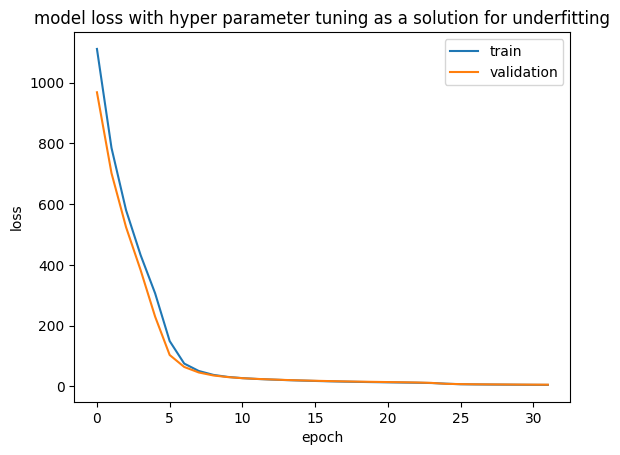

In [27]:
#Visualization of the model results
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss with hyper parameter tuning as a solution for underfitting')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()